# Example Machine Learning Workflow - Housing Prices

Using this Kaggle competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

This will show an example of Linear Regression and XGBoost regression models

https://medium.com/codex/house-price-prediction-with-machine-learning-in-python-cf9df744f7ff

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
import xgboost as xgb

import shap
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)

In [9]:
temp = train.select_dtypes(exclude='object').columns.tolist()
print(temp)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [10]:
train = train[temp]
test = test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]

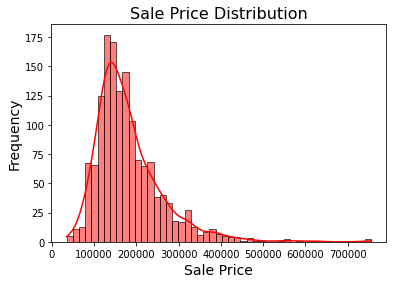

In [12]:
sns.histplot(train['SalePrice'], color = 'r', kde=True)
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.savefig('distplot.png')
plt.show()

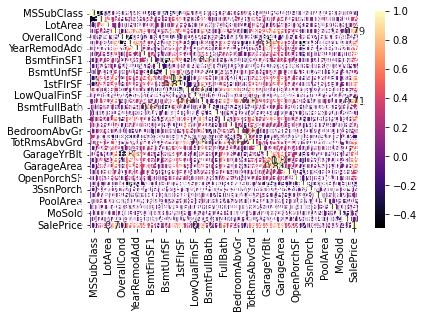

In [14]:
sns.heatmap(train.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()